# Detección y localización de objetos

In [25]:
from transformers import pipeline
from PIL import Image, ImageDraw
from IPython.display import display

In [26]:
# Carga el modelo y define el pipeline
model_name = "google/owlv2-base-patch16-ensemble"
detector = pipeline(model=model_name, task="zero-shot-object-detection")

Device set to use cpu


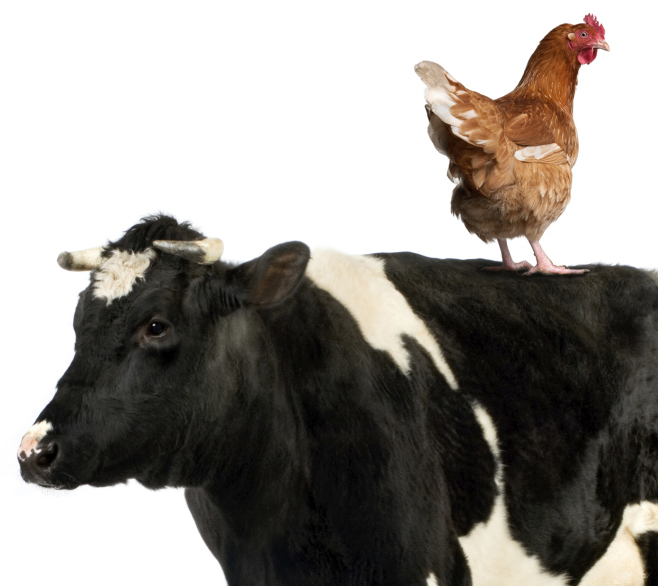

In [33]:
file = "D:\CEIABD\CEIABD\Inteligencia artificial\Tema 14. Redes Generativas Adversarias\ejercicios\cowchicken.png"
image = Image.open(file)
image

In [28]:
# Lista de objetos que queremos detectar
labels = ["cow", "mug", "chicken", "car", "nose", "eye", "fire"]

In [30]:
predictions = detector(image, candidate_labels=labels)

In [31]:
predictions

[{'score': 0.9047486782073975,
  'label': 'chicken',
  'box': {'xmin': 416, 'ymin': 12, 'xmax': 611, 'ymax': 276}},
 {'score': 0.876435399055481,
  'label': 'cow',
  'box': {'xmin': 18, 'ymin': 211, 'xmax': 660, 'ymax': 589}},
 {'score': 0.11321794986724854,
  'label': 'nose',
  'box': {'xmin': 17, 'ymin': 429, 'xmax': 41, 'ymax': 462}}]

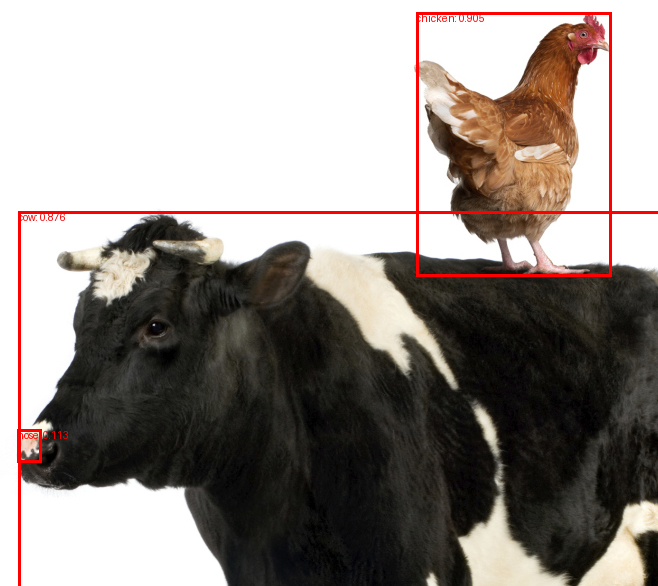

In [34]:
# Dibuja las cajas en la imagen
draw = ImageDraw.Draw(image)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]
    x_min, y_min, x_max, y_max = box.values()
    draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)
    # Colocamos el texto en la esquina superior izquierda del rectángulo.
    draw.text((x_min, y_min), f"{label}: {score:.3f}", fill="red")

display(image)